   # Projeto 2 - Ciência do Dados
___

   ## Arthur Pansini; Enzo Fonteyne; Andre Faia.

   Nosso projeto é focado na industria automobilistica, na qual utilizamos das variaveis ano de fabricação, modelo, tipo de câmbio e quilometros rodados para analizar quais dessas caracteristicas estão mais presentes em carros vendidos acima dos 20 mil dolares. Buscamos trazer uma base de dados ampla e com enorme diversidade de informações acerca do tema, para que se aproxime o maximo possível da realidade!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot
import statsmodels.api as sm

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

In [2]:
data = pd.read_csv("carros.csv")
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
filtro = data.loc[:,["Price", "Prod. year", "Category", "Manufacturer",  "Model","Gear box type", "Mileage", 'Cylinders',
                    'Engine volume', 'Airbags']]

In [4]:
filtro

,Price,Prod. year,Category,Manufacturer,Model,Gear box type,Mileage,Cylinders,Engine volume,Airbags
0,13328,2010,Jeep,LEXUS,RX 450,Automatic,186005 km,6.0,3.5,12
1,16621,2011,Jeep,CHEVROLET,Equinox,Tiptronic,192000 km,6.0,3,8
2,8467,2006,Hatchback,HONDA,FIT,Variator,200000 km,4.0,1.3,2
3,3607,2011,Jeep,FORD,Escape,Automatic,168966 km,4.0,2.5,0
4,11726,2014,Hatchback,HONDA,FIT,Automatic,91901 km,4.0,1.3,4
...,...,...,...,...,...,...,...,...,...,...
19232,8467,1999,Coupe,MERCEDES-BENZ,CLK 200,Manual,300000 km,4.0,2.0 Turbo,5
19233,15681,2011,Sedan,HYUNDAI,Sonata,Tiptronic,161600 km,4.0,2.4,8
19234,26108,2010,Jeep,HYUNDAI,Tucson,Automatic,116365 km,4.0,2,4
19235,5331,2007,Jeep,CHEVROLET,Captiva,Automatic,51258 km,4.0,2,4


In [5]:
filtro.isnull().sum()

Price            0
Prod. year       0
Category         0
Manufacturer     0
Model            0
Gear box type    0
Mileage          0
Cylinders        0
Engine volume    0
Airbags          0
dtype: int64

In [6]:
filtro.tail(10)

,Price,Prod. year,Category,Manufacturer,Model,Gear box type,Mileage,Cylinders,Engine volume,Airbags
19227,29793,2014,Sedan,MERCEDES-BENZ,E 350,Automatic,219030 km,6.0,3.5,12
19228,706,2008,Sedan,MERCEDES-BENZ,E 350,Automatic,122874 km,6.0,3.5,12
19229,50,2008,Hatchback,TOYOTA,Prius,Automatic,150000 km,4.0,1.5,6
19230,470,2011,Hatchback,TOYOTA,Prius,Automatic,307325 km,4.0,1.8,12
19231,5802,2013,Sedan,MERCEDES-BENZ,E 350,Automatic,107800 km,6.0,3.5,12
19232,8467,1999,Coupe,MERCEDES-BENZ,CLK 200,Manual,300000 km,4.0,2.0 Turbo,5
19233,15681,2011,Sedan,HYUNDAI,Sonata,Tiptronic,161600 km,4.0,2.4,8
19234,26108,2010,Jeep,HYUNDAI,Tucson,Automatic,116365 km,4.0,2,4
19235,5331,2007,Jeep,CHEVROLET,Captiva,Automatic,51258 km,4.0,2,4
19236,470,2012,Sedan,HYUNDAI,Sonata,Automatic,186923 km,4.0,2.4,12


In [57]:
data1 = (filtro.loc[filtro['Price']>=20000])
data1 = (data1.loc[filtro['Price']<=500000])
data1 = (data1.loc[filtro['Prod. year']>=1990])

In [58]:
data1.describe()

,Price,Prod. year,Cylinders,Airbags
count,5683.000000,5683.00000,5683.000000,5683.000000
mean,37260.347880,2013.65300,4.685729,6.614112
std,21425.625762,3.22989,1.343156,3.952079
min,20000.000000,1993.00000,1.000000,0.000000
25%,23753.000000,2012.00000,4.000000,4.000000
50%,30887.000000,2014.00000,4.000000,4.000000
75%,43562.000000,2016.00000,6.000000,11.000000
max,308906.000000,2020.00000,16.000000,16.000000


In [59]:
data1.isnull().sum()

Price            0
Prod. year       0
Category         0
Manufacturer     0
Model            0
Gear box type    0
Mileage          0
Cylinders        0
Engine volume    0
Airbags          0
dtype: int64

In [60]:
data1['Mileage'] = data['Mileage'].map(lambda x: x.lstrip('+-').rstrip(' km'))
data1['Mileage'] = data1['Mileage'].astype('int64')

In [62]:
# import required modules
import pandas as pd
import numpy as np
 
# create dataset
df = pd.DataFrame({'Gear box type': ['Automatic', 'Manual', 'Tiptronic', 'Variator'],
                   })
 
# display dataset
print(df)
 
# create dymmy variables
pd.get_dummies(df)

  Gear box type
0     Automatic
1        Manual
2     Tiptronic
3      Variator


,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [28]:
#data1['Gear box type'].cat.categories = [0, 1, 2, 3]
# data1['Gear box type'] = data1['Gear box type'].astype('int64')

In [63]:
data1['Engine volume'] = data1['Engine volume'].map(lambda x: x.lstrip('+-').rstrip(' Turbo'))
data1['Engine volume'] = data1['Engine volume'].astype('float64')

In [64]:
data1['Prod. year'].describe()

count    5683.00000
mean     2013.65300
std         3.22989
min      1993.00000
25%      2012.00000
50%      2014.00000
75%      2016.00000
max      2020.00000
Name: Prod. year, dtype: float64

In [65]:
data1.tail(10)

,Price,Prod. year,Category,Manufacturer,Model,Gear box type,Mileage,Cylinders,Engine volume,Airbags
19198,28225,2015,Jeep,TOYOTA,RAV 4,Automatic,149019,4.0,2.5,0
19200,36065,2013,Sedan,MERCEDES-BENZ,CLA 250 AMG,Tiptronic,68000,4.0,2.0,12
19206,22075,2012,Universal,TOYOTA,Aqua,Automatic,52456,4.0,1.5,4
19207,22197,2012,Hatchback,TOYOTA,Aqua,Automatic,50000,4.0,1.5,4
19208,34811,2013,Jeep,TOYOTA,RAV 4,Tiptronic,121400,4.0,2.5,6
19211,50037,2016,Jeep,HYUNDAI,Santa FE,Automatic,121902,4.0,2.0,4
19216,37633,2017,Jeep,TOYOTA,RAV 4,Tiptronic,23430,4.0,2.5,12
19217,26017,2009,Sedan,LEXUS,ES 300,Automatic,132700,4.0,3.5,4
19227,29793,2014,Sedan,MERCEDES-BENZ,E 350,Automatic,219030,6.0,3.5,12
19234,26108,2010,Jeep,HYUNDAI,Tucson,Automatic,116365,4.0,2.0,4


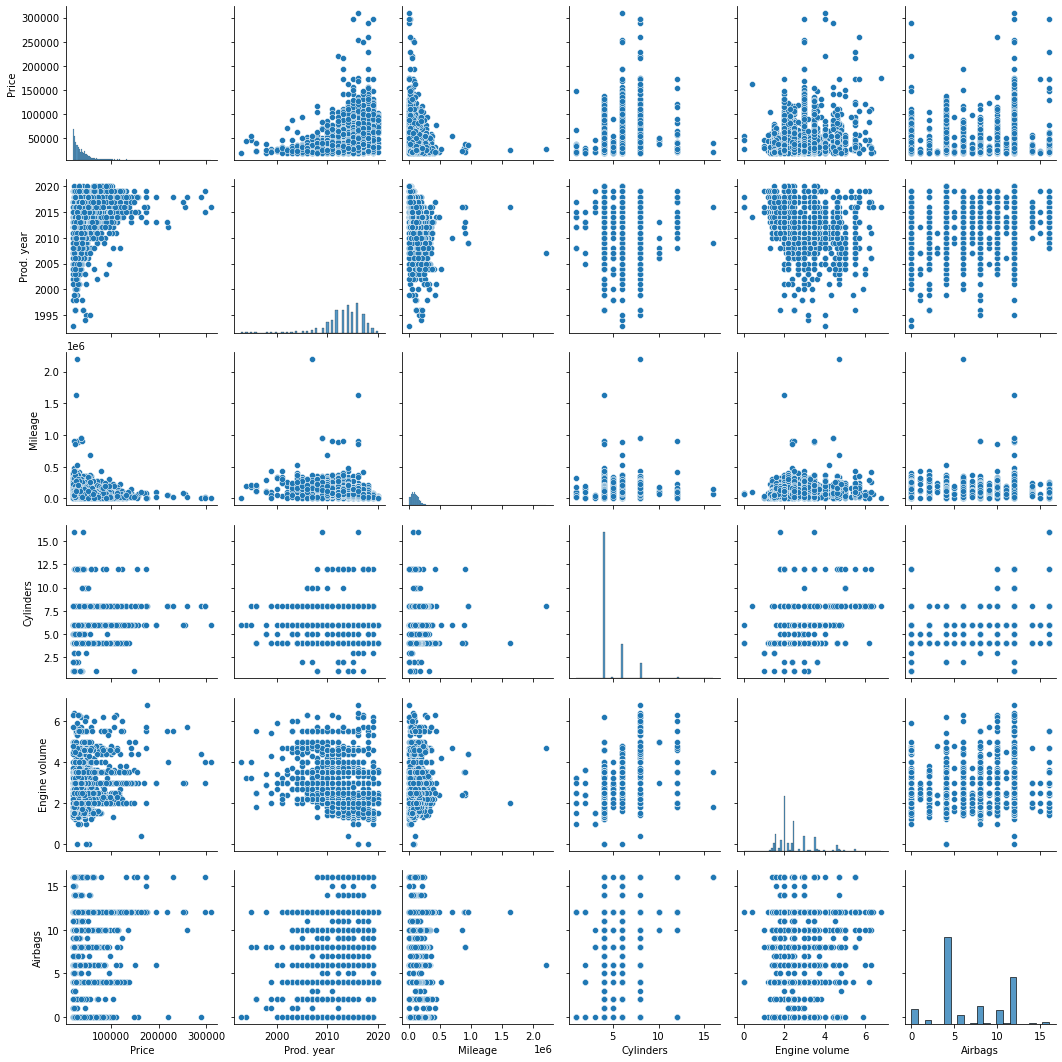

In [66]:
sns.pairplot(data1)

In [67]:
data1.dtypes

Price              int64
Prod. year         int64
Category          object
Manufacturer      object
Model             object
Gear box type     object
Mileage            int64
Cylinders        float64
Engine volume    float64
Airbags            int64
dtype: object

In [68]:
data1.describe()

,Price,Prod. year,Mileage,Cylinders,Engine volume,Airbags
count,5683.000000,5683.00000,5.683000e+03,5683.000000,5683.000000,5683.000000
mean,37260.347880,2013.65300,1.094817e+05,4.685729,2.460021,6.614112
std,21425.625762,3.22989,8.321161e+04,1.343156,0.883538,3.952079
min,20000.000000,1993.00000,0.000000e+00,1.000000,0.000000,0.000000
25%,23753.000000,2012.00000,5.562200e+04,4.000000,2.000000,4.000000
50%,30887.000000,2014.00000,9.900000e+04,4.000000,2.200000,4.000000
75%,43562.000000,2016.00000,1.480000e+05,6.000000,2.800000,11.000000
max,308906.000000,2020.00000,2.200000e+06,16.000000,6.800000,16.000000


In [69]:
### Função utilitária para fazer a regressão com constante adicionada

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [70]:
X = data1[["Prod. year", "Mileage", 'Cylinders',
                    'Engine volume', 'Airbags']]
Y = data1['Price']

In [71]:
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     407.1
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:21:27   Log-Likelihood:                -63866.
No. Observations:                5683   AIC:                         1.277e+05
Df Residuals:                    5677   BIC:                         1.278e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.516e+06   1.79e+05    -30.894      0.000   -5.87e+06   -5.17e+06
Prod. year     2744.8969     88.483     31.022      0.000    2571.437    2918.357
Mileage          -0.0301      0.003     -9.040      0.000      -0.037      -0.024
Cylinders      2545.4987    294.099      8.655      0.000    1968.953    3122.044
Engine volume  7868.4880    456.351     17.242      0.000    6973.866    8763.110
Airbags        -342.7394     63.802     -5.372      0.000    -467.815    -217.663
==============================================================================
Omnibus:                     4824.155   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           257708.384
Skew:                           3.759   Prob(JB):                         0.00
Kurtosis:                      35.122   Cond. No.                     1.01e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = data1
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

#Função retirada do link https://www.kaggle.com/sauravvsrinku/starter-house-sales-in-king-county-8ceb15de-5

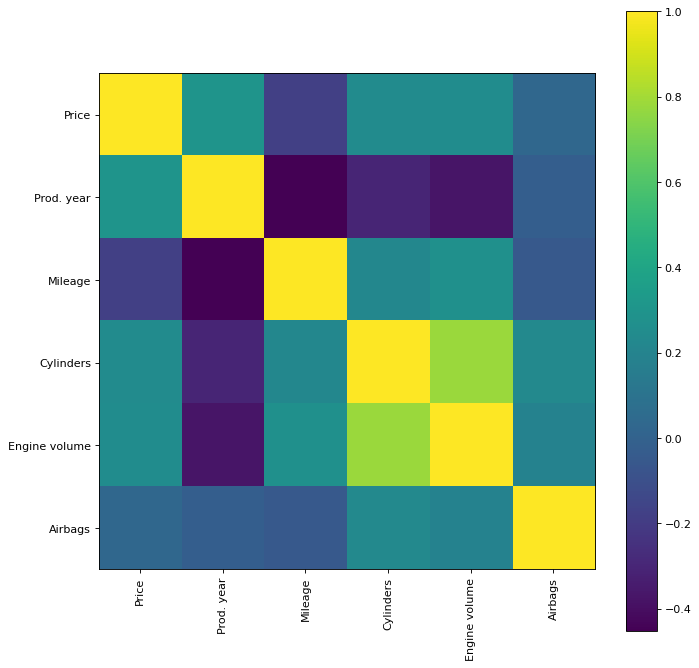

In [91]:
plotCorrelationMatrix(data1, 10)

In [ ]:
# Com base na malha acima escolhemos as variaveis Prod. year e Cylinders para realizar o grafico 3D

In [72]:
X = data1[["Prod. year", 'Cylinders',
                    ]]
Y = data1['Price']

In [73]:
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     781.5
Date:                Tue, 23 Nov 2021   Prob (F-statistic):          1.56e-300
Time:                        16:21:28   Log-Likelihood:                -64045.
No. Observations:                5683   AIC:                         1.281e+05
Df Residuals:                    5680   BIC:                         1.281e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -5.5e+06   1.65e+05    -33.336      0.000   -5.82e+06   -5.18e+06
Prod. year  2735.9703     81.793     33.450      0.000    2575.625    2896.316
Cylinders   5943.9107    196.688     30.220      0.000    5558.327    6329.494
==============================================================================
Omnibus:                     4750.722   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234791.088
Skew:                           3.695   Prob(JB):                         0.00
Kurtosis:                      33.609   Cond. No.                     1.32e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
# Recupera os parâmetros calculados
beta0_hat = results.params[0]  # Price
beta1_hat = results.params[1]  # Prod. year
beta2_hat = results.params[2]  # cylinders

In [77]:
# Define uma função que aplica aos parâmetros
def f(feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

In [78]:
# Gera 100 pontos entre os menores e maiores valores de cada feature
npoints = 100
feature1 = X['Prod. year']
feature2 = X['Cylinders']
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

In [79]:
# Constrói uma grade de 100x100 pontos 
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

In [80]:
# Aplica a função em cada ponto da grade 
# Constrói plano estimado
fit_z = f(eixo_x, eixo_y)

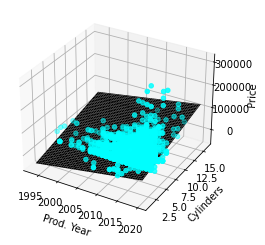

In [92]:
# Plota os pontos e o plano em 3D
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z, color='black')
plt3d.scatter(feature1, feature2, Y, color="cyan")
plt3d.set_xlabel("Prod. Year")
plt3d.set_ylabel("Cylinders")
plt3d.set_zlabel("Price")
plt.show()